# Part 1 -  Does Renovation Effect House Price?

Here we will Ask 3 question:
    1. Does the house price go down as the age of the building increase?
    2. Does the the house price go down as time since renovation increases?
    3. If the house was not renovated:
           ->  Does the house price decrecre more than if it would have been renovated.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('kc_house_data_clean.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,year,month,day,month_year,price_bands,yr_built_bands
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,...,47.5112,-122.257,1340,5650,2014,10,13,13-2014,200K to 300K,1950s
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,47.7210,-122.319,1690,7639,2014,12,9,9-2014,500K to 600K,1950s
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,47.7379,-122.233,2720,8062,2015,2,25,25-2015,100K to 200K,1930s
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,47.5208,-122.393,1360,5000,2014,12,9,9-2014,600K to 700K,1960s
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,47.6168,-122.045,1800,7503,2015,2,18,18-2015,500K to 600K,1980s


## Add in Correlation Calculator

In [3]:
def mean_normalize(var):
    norm = []
    
    mean = sum(var)/len(var)
    
    for i in var:
        norm.append(i-mean)
    
    return norm

def dot_product(x, y):
    prodcut = 0
    
    for i in range(len(x)):
        prd = x[i]*y[i]
        prodcut += prd
    return prodcut

def covariance(var1, var2):
    n = len(var1)
    x = mean_normalize(var1)
    y = mean_normalize(var2)
    
    dot_product(x, y)
    
def correlation(var1, var2): # Calculates the "r" value.
    
    if len(var1) != len(var2):
        return 'The lengths of both the lists should be equal.' 
    else: 
       
        mean_norm_var1 = mean_normalize(var1)
        mean_norm_var2 = mean_normalize(var2)
        
        var1_dot_var2 = dot_product(mean_norm_var1, mean_norm_var2)
        
        var1_squared = [i * i for i in mean_norm_var1]
        var2_squared = [i * i for i in mean_norm_var2]
        
        return round(var1_dot_var2 / math.sqrt(sum(var1_squared) * sum(var2_squared)), 3)

## Add Regrestion Line Calculator

In [45]:
def calc_slope(xs, ys):

    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

def calc_intercept(xs, ys):

    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return c

def reg_line (m, c, X):
    
    return [(m*x)+c for x in X]

def sum_sq_err(ys_real, ys_predicted):

    sse =  sum((ys_predicted - ys_real) * (ys_predicted - ys_real))
    
    return sse

def r_squared(ys_real, ys_predicted):
    
    # Calculate Y_mean , squared error for regression and mean line , and calculate r-squared
    y_mean = [np.mean(ys_real) for y in ys_real]

    sq_err_reg = sum_sq_err(ys_real, ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    # Calculate r-squared 
    r_sq =  1 - (sq_err_reg/sq_err_y_mean)
    
    return r_sq

def reg_basic_and_plot(X, Y, title):
    
    m = calc_slope(X,Y)
    c = calc_intercept(X,Y)
    Y_pred = reg_line(m, c, X)
    r = correlation(X,Y)
    r_sqrd = r_squared(Y,Y_pred)
    
    print ('Basic Regression Diagnostics')
    print ('----------------------------')
    print ('Slope:', round(m, 2))
    print ('Y-Intercept:', round(c, 2))
    print ('Correlation:', r)
    print ('R-Squared:', round(r_sqrd, 3))
    print ('----------------------------')
    print ('Model: Y =',round(m, 2),'* X +', round(c, 2))
    
    plt.figure(figsize=(15,10))
    plt.scatter(X, Y, color='#003F72', label='data')
    plt.plot(X, Y_pred, label='regression line')
    plt.title(title)
    plt.legend(loc=2)
    plt.show()
    return None

def compare_reg_basic_and_plot(X, Y, L, P, title):
    
    # X & Y Results
    m1 = calc_slope(X,Y)
    c1 = calc_intercept(X,Y)
    Y_pred = reg_line(m1, c1, X)
    r1 = correlation(X,Y)
    r_sqrd1 = r_squared(Y,Y_pred)
    
    print ('Data_1 Regression Diagnostics')
    print ('----------------------------')
    print ('Sample Size:', len(X))
    print ('Slope:', round(m1, 2))
    print ('Y-Intercept:', round(c1, 2))
    print ('Correlation:', r1)
    print ('R-Squared:', round(r_sqrd1, 3))
    print ('----------------------------')
    print ('Model: Y =',round(m1, 2),'* X +', round(c1, 2))
    
    # L & P Results
    m2 = calc_slope(L,P)
    c2 = calc_intercept(L,P)
    P_pred = reg_line(m2, c2, L)
    r2 = correlation(X,Y)
    r_sqrd2 = r_squared(Y,Y_pred)
    
    print ('\n\nData_2 Regression Diagnostics')
    print ('----------------------------')
    print ('Sample Size:', len(L))
    print ('Slope:', round(m2, 2))
    print ('Y-Intercept:', round(c2, 2))
    print ('Correlation:', r2)
    print ('R-Squared:', round(r_sqrd2, 3))
    print ('----------------------------')
    print ('Model: Y =',round(m2, 2),'* X +', round(c2, 2))
    
    
    
    plt.figure(figsize=(15,10))
    plt.scatter(X, Y, color='blue', label='Data_1')
    plt.plot(X, Y_pred, label='regression line_1')
    plt.scatter(L, P, color='orange', label='Data_2')
    plt.plot(L, P_pred, label='regression line_2')
    plt.title(title)
    plt.legend(loc=2)
    plt.show()
    return None

## Create:  "age" column

In [5]:
now = 2016

In [6]:
df['age'] = now - df['yr_built']

## Create a column Renovated Yes/No

In [7]:
is_renovated = df['yr_renovated']
is_renovated.describe().apply(lambda x: format(x, 'f'))
temp = []
for ren in is_renovated:
    if ren > 0:
        temp.append('renovated')
    else:
        temp.append('not_renovated')
        
df['is_ren'] = temp
        

In [8]:
df['is_ren'].unique()

array(['not_renovated', 'renovated'], dtype=object)

## Create a column that show if this property is on the list mulitiple times

In [9]:
def dup_counter(data):
    dup_dict = {}
    dup_list = []
    values = sorted(list(map(lambda x: x, data)))
    
    for val in values:
        if val in dup_dict: 
            dup_dict[val] += 1
        else:
            dup_dict[val] = 1

    sorted_dup_dict = sorted(dup_dict.items(), key = lambda x: x[1], reverse = True)
    dup_temp = list(sorted_dup_dict)
    
    for d in dup_temp:
        if d[1] > 1:
            dup_list.append(d)
    return dup_list

In [10]:
dup_houses_count = dup_counter(df['id'])
print(len(dup_houses_count))
dup_houses_count[:5]

176


[(795000620, 3), (1000102, 2), (7200179, 2), (109200390, 2), (123039336, 2)]

From this extract just the 'id' 

In [11]:
def dup_id_only(data):
    new_list = []
    for d in data:
        new_list.append(d[0])
    return new_list

In [12]:
dup_houses = dup_id_only(dup_houses_count)

#### Add a new column in data frame to show if its going to dup_yes_no.

In [13]:
house_ids = df['id']
dup_id_yes_no = []
for h in house_ids:
    for d in dup_houses:
        if d == h:
            dup_id_yes_no.append(1)
#         else:
#             dup_id_yes_no.append(0)

# df['dup_yes_no'] = dup_id_yes_no
len(dup_id_yes_no)

353

In [14]:
df.shape

(21595, 30)

## Create: age since renovation column

In [15]:
print(df['yr_built'].min())

1900


In [16]:
def percentage_zero_val(data):
    counter = 0
    for d in data:
        if d == 0:
            counter += 1
    return round((counter/int(len(data)))*100, 3)

In [17]:
percentage_zero_val(df['yr_built'])

0.0

Not a significant loss. Therefore modify the DataFrame to exclude properties that are of unknown age.

In [18]:
df_known_age = df.loc[df['yr_built'] > 0]
print(df.shape)
print(df_known_age.shape)
print(df_known_age['yr_built'].min())
df_known_age.head()

(21595, 30)
(21595, 30)
1900


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_living15,sqft_lot15,year,month,day,month_year,price_bands,yr_built_bands,age,is_ren
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,...,1340,5650,2014,10,13,13-2014,200K to 300K,1950s,61,not_renovated
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,1690,7639,2014,12,9,9-2014,500K to 600K,1950s,65,renovated
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,2720,8062,2015,2,25,25-2015,100K to 200K,1930s,83,not_renovated
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,1360,5000,2014,12,9,9-2014,600K to 700K,1960s,51,not_renovated
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,1800,7503,2015,2,18,18-2015,500K to 600K,1980s,29,not_renovated


### Creating the new column

In [19]:
temp_age_since_ren = df['yr_renovated']
temp = []
i = 0
for val in temp_age_since_ren:
    if val > 0:
        val = now - df['yr_renovated'][i]
        temp.append(val)
        i += 1
    else:
        val = now - df['yr_built'][i]
        temp.append(val)
        i += 1

df['age_since_ren'] = temp

In [20]:
df['age_since_ren'].unique()

array([ 61,  25,  83,  51,  29,  15,  21,  53,  56,  13,  74,  89,  39,
       116,  37,  22, 100,  95,  47,  69,  48,  31,  75, 101, 107,  68,
        11,  87,  35,  14, 112,  20,  16,  32,   2,  94,  57,  50,  63,
        66,   8,  62,  43,  91,  27,  44,  30,  60,  24,  52,  64,  55,
        10,  28,  54,  77,  49,  41,  36, 106,  33,   6,  38, 111,  45,
        71,  92,  26,  90,  12,  93,   9,   3,  40,  67,  17, 115,  23,
        96,  19,  73,  76,  98,  88,  42, 105,  86,  80,  79,  34, 108,
        85,  59,  18, 103, 109,  58,   5,   4, 104,  99,  70,  65,  84,
        72, 114,   7,  46,   1,  82,  78,  97, 102, 110, 113,  81])

In [21]:
print(df['age'].head())
print(df['age_since_ren'].head())

0    61
1    65
2    83
3    51
4    29
Name: age, dtype: int64
0    61
1    25
2    83
3    51
4    29
Name: age_since_ren, dtype: int64


Basic Regression Diagnostics
----------------------------
Slope: -674.91
Y-Intercept: 570679.53
Correlation: -0.054
R-Squared: 0.003
----------------------------
Model: Y = -674.91 * X + 570679.53


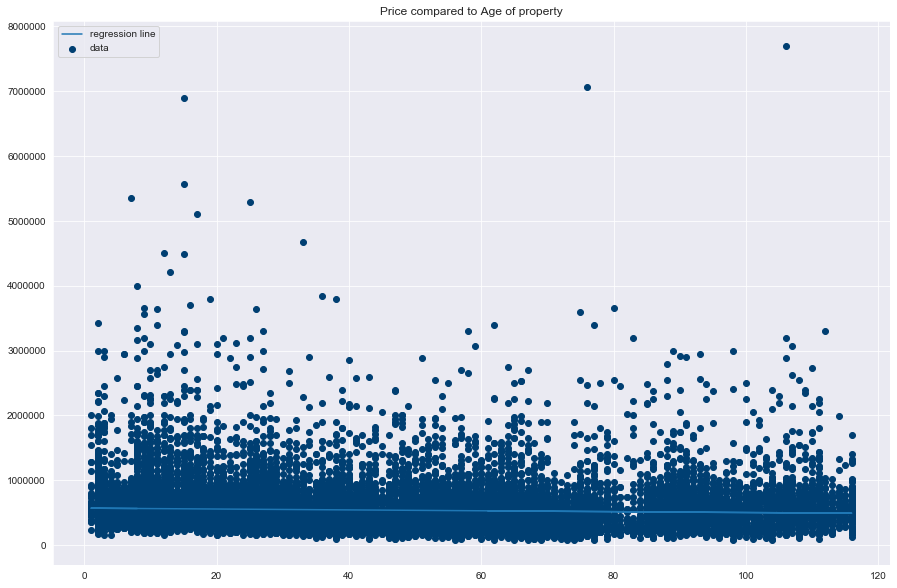

In [22]:
reg_basic_and_plot(df['age'], df['price'], "Price compared to Age of property")

Basic Regression Diagnostics
----------------------------
Slope: -1238.14
Y-Intercept: 593615.19
Correlation: -0.098
R-Squared: 0.01
----------------------------
Model: Y = -1238.14 * X + 593615.19


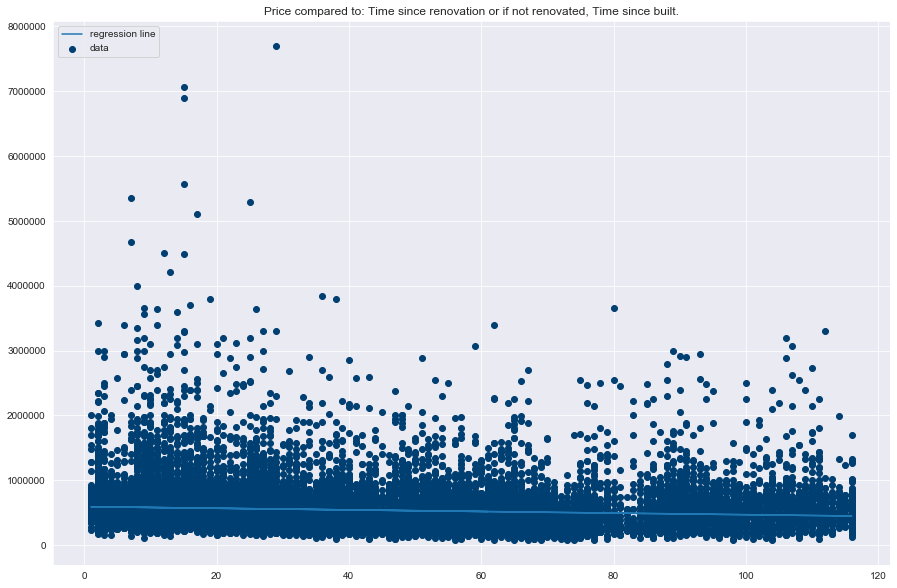

In [23]:
reg_basic_and_plot(df['age_since_ren'], df['price'], "Price compared to: Time since renovation or if not renovated, Time since built.")

Data_1 Regression Diagnostics
----------------------------
Sample Size: 20851
Slope: -996.35
Y-Intercept: 575865.79
Correlation: -0.082
R-Squared: 0.007
----------------------------
Model: Y = -996.35 * X + 575865.79


Data_2 Regression Diagnostics
----------------------------
Sample Size: 744
Slope: -1908.09
Y-Intercept: 914955.28
Correlation: -0.082
R-Squared: 0.007
----------------------------
Model: Y = -1908.09 * X + 914955.28


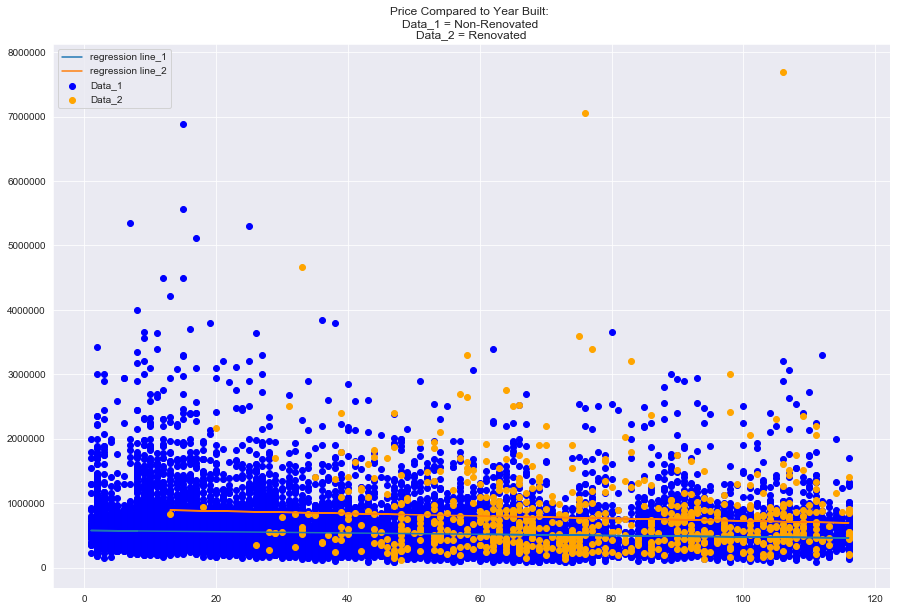

In [42]:
compare_reg_basic_and_plot(df_non_ren['age'], df_non_ren['price'], df_ren['age'], df_ren['price'], 
                           "Price Compared to Year Built: \nData_1 = Non-Renovated \nData_2 = Renovated")

In [80]:
non_ren_age = df_non_ren.loc[df_non_ren['age'] < 1950, ['age']]
non_ren_price = df_non_ren.loc[df_non_ren['age'] < 1950, ['price']]

ren_age = df_ren.loc[df_ren['age'] < 1950, ['age']]
ren_price = df_ren.loc[df_ren['age'] < 1950, ['price']]

In [81]:
compare_reg_basic_and_plot(non_ren_age, non_ren_price, ren_age, ren_price,
                           "Price Compared to Year Built: \nData_1 = Non-Renovated \nData_2 = Renovated")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

### Now broken down into decade bins:

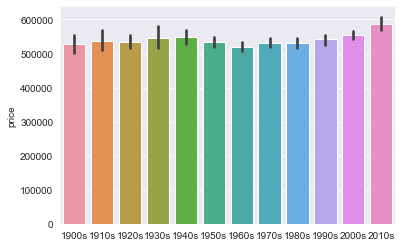

In [48]:
sns.barplot(sorted(df['yr_built_bands']), df['price'])

In [79]:
sns.barplot(df, df['yr_built_bands'], df['yr_renovated'])

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [72]:
p = sns.FacetGrid(df, col=['df[price_bands]'], row=df['is_ren'])
p = p.map(plt.hist, 'age')

KeyError: "None of [Index(['not_renovated', 'renovated', 'not_renovated', 'not_renovated',\n       'not_renovated', 'not_renovated', 'not_renovated', 'not_renovated',\n       'not_renovated', 'not_renovated',\n       ...\n       'not_renovated', 'not_renovated', 'not_renovated', 'not_renovated',\n       'not_renovated', 'not_renovated', 'not_renovated', 'not_renovated',\n       'not_renovated', 'not_renovated'],\n      dtype='object', length=21595)] are in the [columns]"

In [75]:
g = sns.FacetGrid(df, 
              col=sorted(df['yr_built_bands']), 
                         row=sorted(df['price_bands']))

g = g.map(plt.scatter, "price", "age")

KeyError: "None of [Index(['200K to 300K', '500K to 600K', '100K to 200K', '600K to 700K',\n       '900K to 1M', '300K to 400K', '400K to 500K', '700K to 800K',\n       '800K to 900K', '0 to 100K'],\n      dtype='object')] are in the [columns]"

# 1a. Data Frame - Renovated House's



Create a new DataFrame but just for houses which have been renovated

In [25]:
df_ren = df.loc[df['yr_renovated'] != 0]

In [26]:
df_ren.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,year,month,day,month_year,price_bands,yr_built_bands,age,is_ren,age_since_ren
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,7639,2014,12,9,9-2014,500K to 600K,1950s,65,renovated,25
35,35,9547205180,6/13/2014,696000.0,3,2.50,2300,3060,1.5,0.0,...,3264,2014,6,13,13-2014,600K to 700K,1930s,86,renovated,14
95,95,1483300570,9/8/2014,905000.0,4,2.50,3300,10250,1.0,0.0,...,6045,2014,9,8,8-2014,900K to 1M,1940s,70,renovated,25
103,103,2450000295,10/7/2014,1090000.0,3,2.50,2920,8113,2.0,0.0,...,8113,2014,10,7,7-2014,900K to 1M,1950s,66,renovated,6
125,125,4389200955,3/2/2015,1450000.0,4,2.75,2750,17789,1.5,0.0,...,11275,2015,3,2,2-2015,900K to 1M,1910s,102,renovated,24


In [27]:
df_ren.shape

(744, 31)

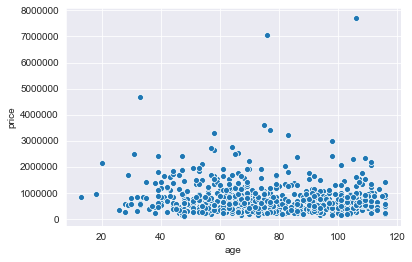

In [28]:
sns.scatterplot(data=df_ren, x=df_ren['age'], y=df_ren['price'])

Basic Regression Diagnostics
----------------------------
Slope: -1908.09
Y-Intercept: 914955.28
Correlation: -0.067
R-Squared: 0.005
----------------------------
Model: Y = -1908.09 * X + 914955.28


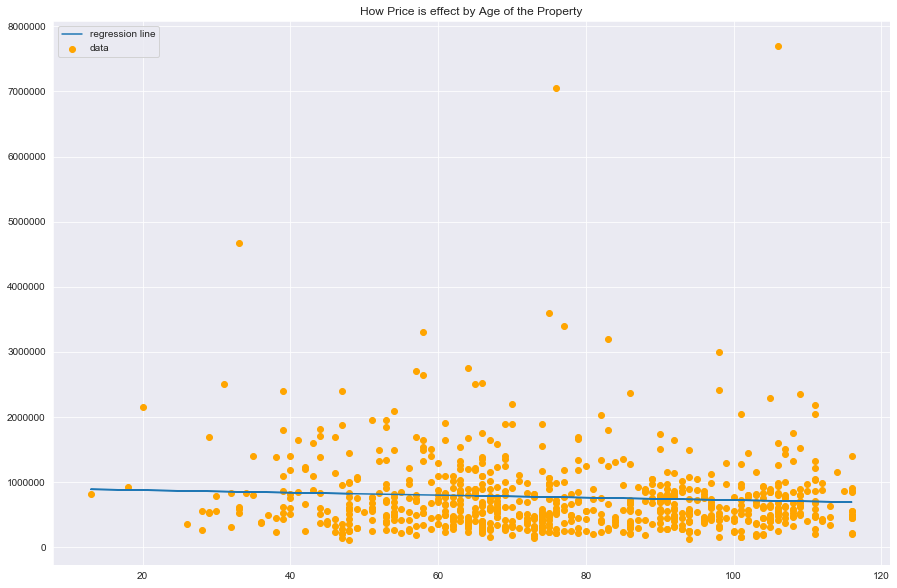

In [44]:
reg_basic_and_plot(df_ren['age'], df_ren['price'], "How Price is effect by Age of the Property")

### Analysis - Renovated House's 
From the above progression it shows that for every year the price will decrease by just over $2000 . This is a substanitall amount of money but is it significant compared to houses that have not been renovated?

First though as the equation is:

    Price = (-2045.39 * Age) + 924176.48
    
So lets look at the median house age and return the price.

In [30]:
df_ren['age'].median()

74.5

In [31]:
-2045.39*(df_ren['age'].median()) + 924176.48

771794.925

Just checking that all the renovated house have year built values. As in the initial dataframe the there were yr_bulit values equal to zero.

In [32]:
df_ren['yr_built'].unique()

array([1951, 1930, 1946, 1950, 1914, 1916, 1920, 1957, 1915, 1904, 1954,
       1905, 1922, 1928, 1909, 1976, 1925, 1943, 1965, 1903, 1937, 1911,
       1912, 1960, 1923, 1958, 1972, 1959, 1942, 1938, 1968, 1907, 1982,
       1936, 1964, 1998, 1921, 1952, 1919, 1910, 1975, 1984, 1917, 1944,
       1924, 1900, 1988, 1913, 1908, 1935, 1945, 1941, 1926, 1918, 1932,
       1970, 1939, 1962, 1947, 1966, 1974, 1948, 1956, 1940, 1978, 1955,
       1983, 1934, 1949, 1977, 1963, 1953, 1990, 1931, 1981, 1902, 1969,
       1927, 1987, 1967, 1986, 1980, 1929, 1973, 1933, 1961, 1906, 1971,
       1979, 1901, 1985, 2003, 1996])

# 1b. DataFrame - Non_Renovated House's

There was a house that it's year built was zero so it must be excluded from this data frame.

In [33]:
df_non_ren = df.loc[(df['yr_renovated'] == 0) & (df['yr_built'] != 0)]

In [34]:
df_non_ren.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_lot15,year,month,day,month_year,price_bands,yr_built_bands,age,is_ren,age_since_ren
0,0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0.0,...,5650,2014,10,13,13-2014,200K to 300K,1950s,61,not_renovated,61
2,2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,...,8062,2015,2,25,25-2015,100K to 200K,1930s,83,not_renovated,83
3,3,2487200875,12/9/2014,604000.0,4,3.0,1960,5000,1.0,0.0,...,5000,2014,12,9,9-2014,600K to 700K,1960s,51,not_renovated,51
4,4,1954400510,2/18/2015,510000.0,3,2.0,1680,8080,1.0,0.0,...,7503,2015,2,18,18-2015,500K to 600K,1980s,29,not_renovated,29
5,5,7237550310,5/12/2014,1230000.0,4,4.5,5420,101930,1.0,0.0,...,101930,2014,5,12,12-2014,900K to 1M,2000s,15,not_renovated,15


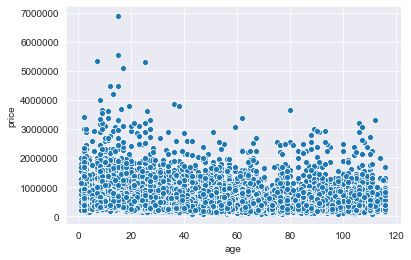

In [35]:
sns.scatterplot(data=df_non_ren, x=df_non_ren['age'], y=df_non_ren['price'])

Basic Regression Diagnostics
----------------------------
Slope: -996.35
Y-Intercept: 575865.79
Correlation: -0.082
R-Squared: 0.007
----------------------------
Model: Y = -996.35 * X + 575865.79


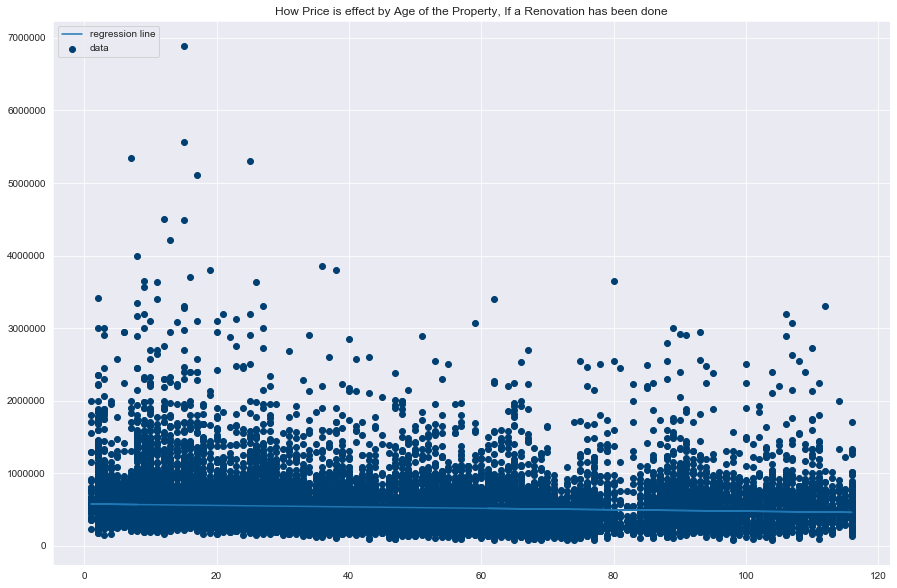

In [36]:
reg_basic_and_plot(df_non_ren['age'], df_non_ren['price'], "How Price is effect by Age of the Property, If a Renovation has been done")

### Analysis - If house not Renovated:

I this case the house price does decrease, but only by $996.65 per year. 

Benifit of not renovating: re

Just checking that all the non-renovated house have year built values. As in the initial dataframe the there were yr_bulit values equal to zero.

In [37]:
# sorted(df_non_ren['yr_built'].unique())

# Part 2 - Breaking the Houses Clasifications 

In this section we will be breaking down the houses into further catagorise and comapreing the non-renovated top the renovated in diffent metrics:

    2a. Price Bands
    2b. Number of Bedrooms
    2c. Number of Bathrooms
    2d. sqft_lot
    2e. sqft_living
    2f. Building Condition
    2g. Building Grade

### 2a. Price Band - Renovated

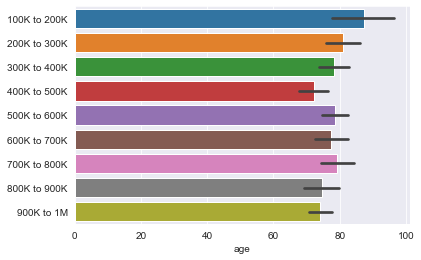

In [38]:
sns.barplot(y=sorted(df_ren['price_bands']), x=df_ren['age']) # title="Price Bands to age of property"

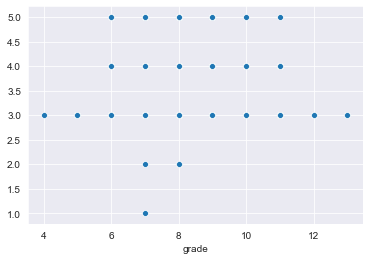

In [68]:
sns.scatterplot(y=sorted(df_ren['condition']), x=df_ren['grade'])

In [39]:
# df_ren.set_index(df_ren['price_bands'])

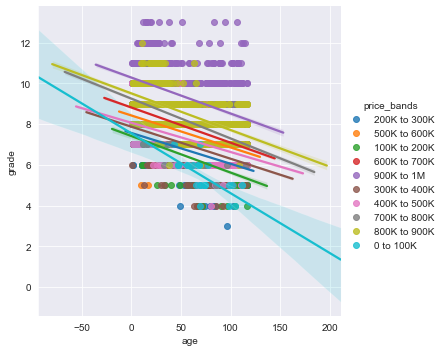

In [63]:
sns.lmplot(data=df, x="age", y="grade", hue="price_bands")

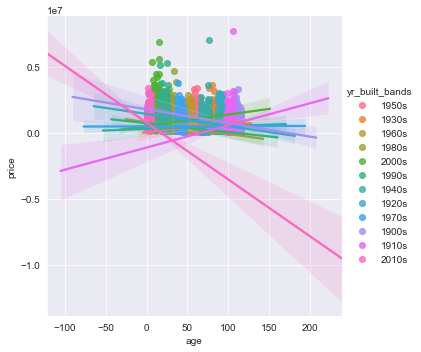

In [65]:
sns.lmplot(data=df, x="age", y="price", hue="yr_built_bands")

In [ ]:
reg_basic_and_plot()

## Renovated - Bedrooms

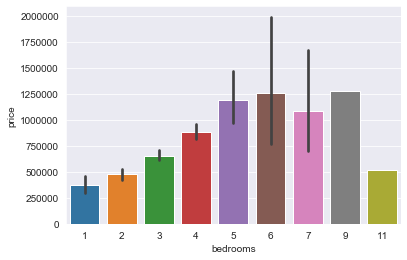

In [41]:
sns.barplot(x=df_ren['bedrooms'], y=df_ren['price'])